In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


In [4]:
#load the shampoo sales dataset
data=pd.read_csv('Analyse_Training.csv',usecols=[1],names=["Training_Deficiencies"],header=0)

In [5]:
data

,Training_Deficiencies
0,132
1,134
2,132
3,130
4,130
5,126
6,128
7,125
8,128
9,129


In [6]:
#covert time series format
data.index=pd.date_range(start="1901-01",periods=len(data),freq="M")
#converts the datsets into a time series format with a monthly frequency

In [22]:
data.head()

,Training_Deficiencies
1901-01-31,132
1901-02-28,134
1901-03-31,132
1901-04-30,130
1901-05-31,130


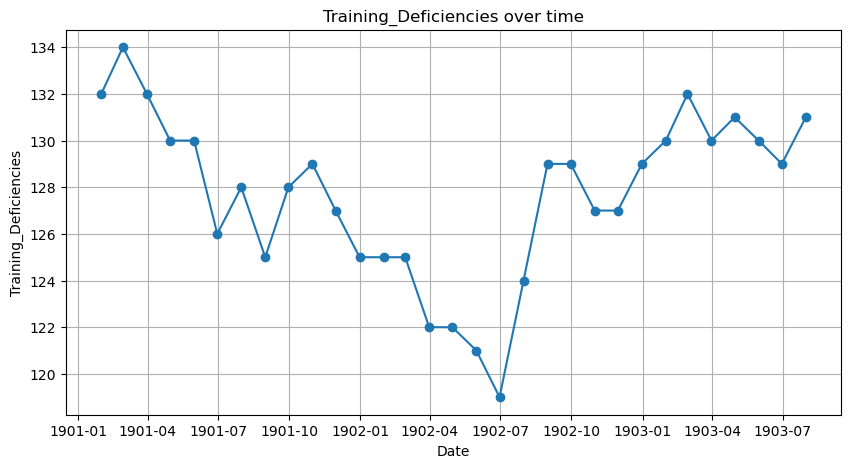

In [8]:
#visulaize the data 
plt.figure(figsize=(10,5))
plt.plot(data,marker='o',linestyle=("-"))
plt.title("Training_Deficiencies over time")
plt.xlabel("Date")
plt.ylabel("Training_Deficiencies")
plt.grid()
plt.show()


In [9]:
result = adfuller(data['Training_Deficiencies'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
if result[1] <= 0.05:
    print('The series is stationary')
else:
    print('The series is non-stationary')

ADF Statistic: -1.853347
p-value: 0.354316
The series is non-stationary


In [10]:
#differencing  to make te data sationary 
data_diff=data.diff().dropna()

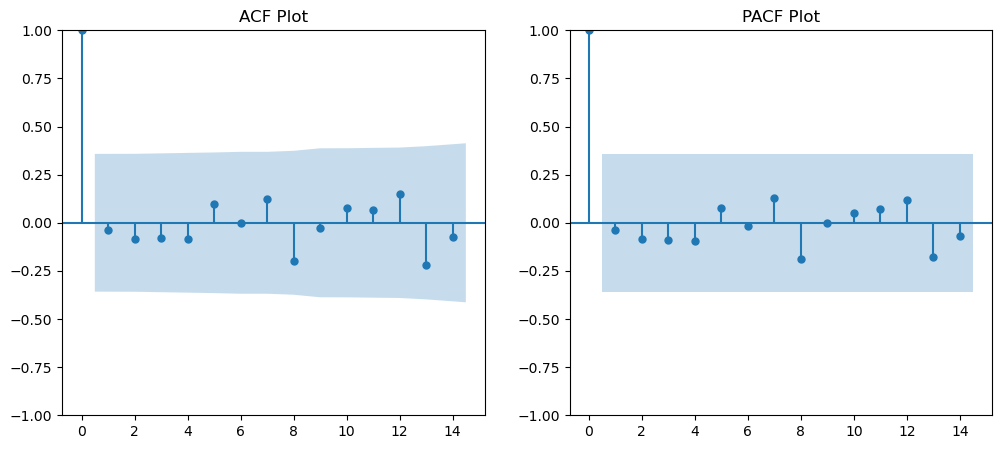

In [12]:
#plot ACF and PACF 
fig,axes=plt.subplots(1,2,figsize=(12,5))
plot_acf(data_diff,lags=14, ax=axes[0])
plot_pacf(data_diff,lags=14,method='ywm', ax=axes[1])
axes[0].set_title("ACF Plot")
axes[1].set_title("PACF Plot")
plt.show()

In [14]:
#fit arima model(p,d,q) =(1,1,1) based on acf and pacf analysis
model = ARIMA(data,order=(1,1,1))
model_fit=model.fit()

C:\Users\rajpu\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\rajpu\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [15]:
#arima(5,1,0) is chosen based on acf and pacf analysis 


In [16]:
#print model summary 
print(model_fit.summary())

                                 SARIMAX Results                                 
Dep. Variable:     Training_Deficiencies   No. Observations:                   31
Model:                    ARIMA(1, 1, 1)   Log Likelihood                 -65.887
Date:                   Thu, 10 Apr 2025   AIC                            137.773
Time:                           01:31:38   BIC                            141.977
Sample:                       01-31-1901   HQIC                           139.118
                            - 07-31-1903                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8700      0.300      2.904      0.004       0.283       1.457
ma.L1         -0.9996     24.939     -0.040      0.968     -49.879      47.880
sigma2         4.5611    113

In [17]:
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)
# forecasts 12 future time points(next12 mothns )
#forecast enerates predicted values baesd on the trained arima model

In [28]:
print(forecast)

1903-08-31    130.717901
1903-09-30    130.472475
1903-10-31    130.258956
1903-11-30    130.073194
1903-12-31    129.911583
1904-01-31    129.770981
1904-02-29    129.648658
1904-03-31    129.542238
1904-04-30    129.449652
1904-05-31    129.369103
1904-06-30    129.299026
1904-07-31    129.238058
Freq: M, Name: predicted_mean, dtype: float64
